<a href="https://colab.research.google.com/github/JeffersonBP/Aula-_JavascriptJeff/blob/main/Jeff_exercise_1_of_PL_A1_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Modelo
---





Aqui, criamos um dicionário de têrmos (palavras) sobre a biografia da atriz **Kate Beckinsale**. 

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [4]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://github.com/JeffersonBP/Mackenzie_aula1/blob/main/exercicio1.txt'): 
    texto.append(line.decode('utf-8'))

# f = open('/kate_beckinsale.txt','r')    # para arquivos locais
# for line in f:
#    texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    


# Construção do Dicionário

In [3]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    

{'<!doctype': 1, 'html>': 1, '<html': 1, 'lang="en"': 1, 'data-color-mode="auto"': 1, 'data-light-theme="light"': 1, 'data-dark-theme="dark">': 1, '<head>': 1, '<meta': 33, 'charset="utf-8">': 1, '<link': 19, 'rel="dns-prefetch"': 4, 'href="https://githubgithubassetscom">': 1, 'href="https://avatarsgithubusercontentcom">': 2, 'href="https://github-clouds3amazonawscom">': 1, 'href="https://user-imagesgithubusercontentcom/">': 1, 'rel="preconnect"': 2, 'href="https://githubgithubassetscom"': 1, 'crossorigin>': 1, 'crossorigin="anonymous"': 134, 'media="all"': 11, 'integrity="sha512-9m4gwjqbatcm6cmz2urco6uux1/wa8wunm7n5bqhghfch1oix2y8dcpuxfnqvq2he2bd287o5ymxuc5jfacu8w=="': 1, 'rel="stylesheet"': 11, 'href="https://githubgithubassetscom/assets/light-f4ce06c09a810130a6e8css"': 1, '/><link': 6, 'integrity="sha512-bewn74xxmv+l2zarqgm+kgvvx3bgy85lf4umkznz6zl6iciybr1igxiyxqnucw0rden1km7glvxkpmqsntpvyq=="': 1, 'href="https://githubgithubassetscom/assets/dark-044c0def8c719aff8bdbcss"': 1, 'data-c

# Exibição dos Resultados

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8629 missing from current font.
  font.set_text(s, 0, flags=flags)


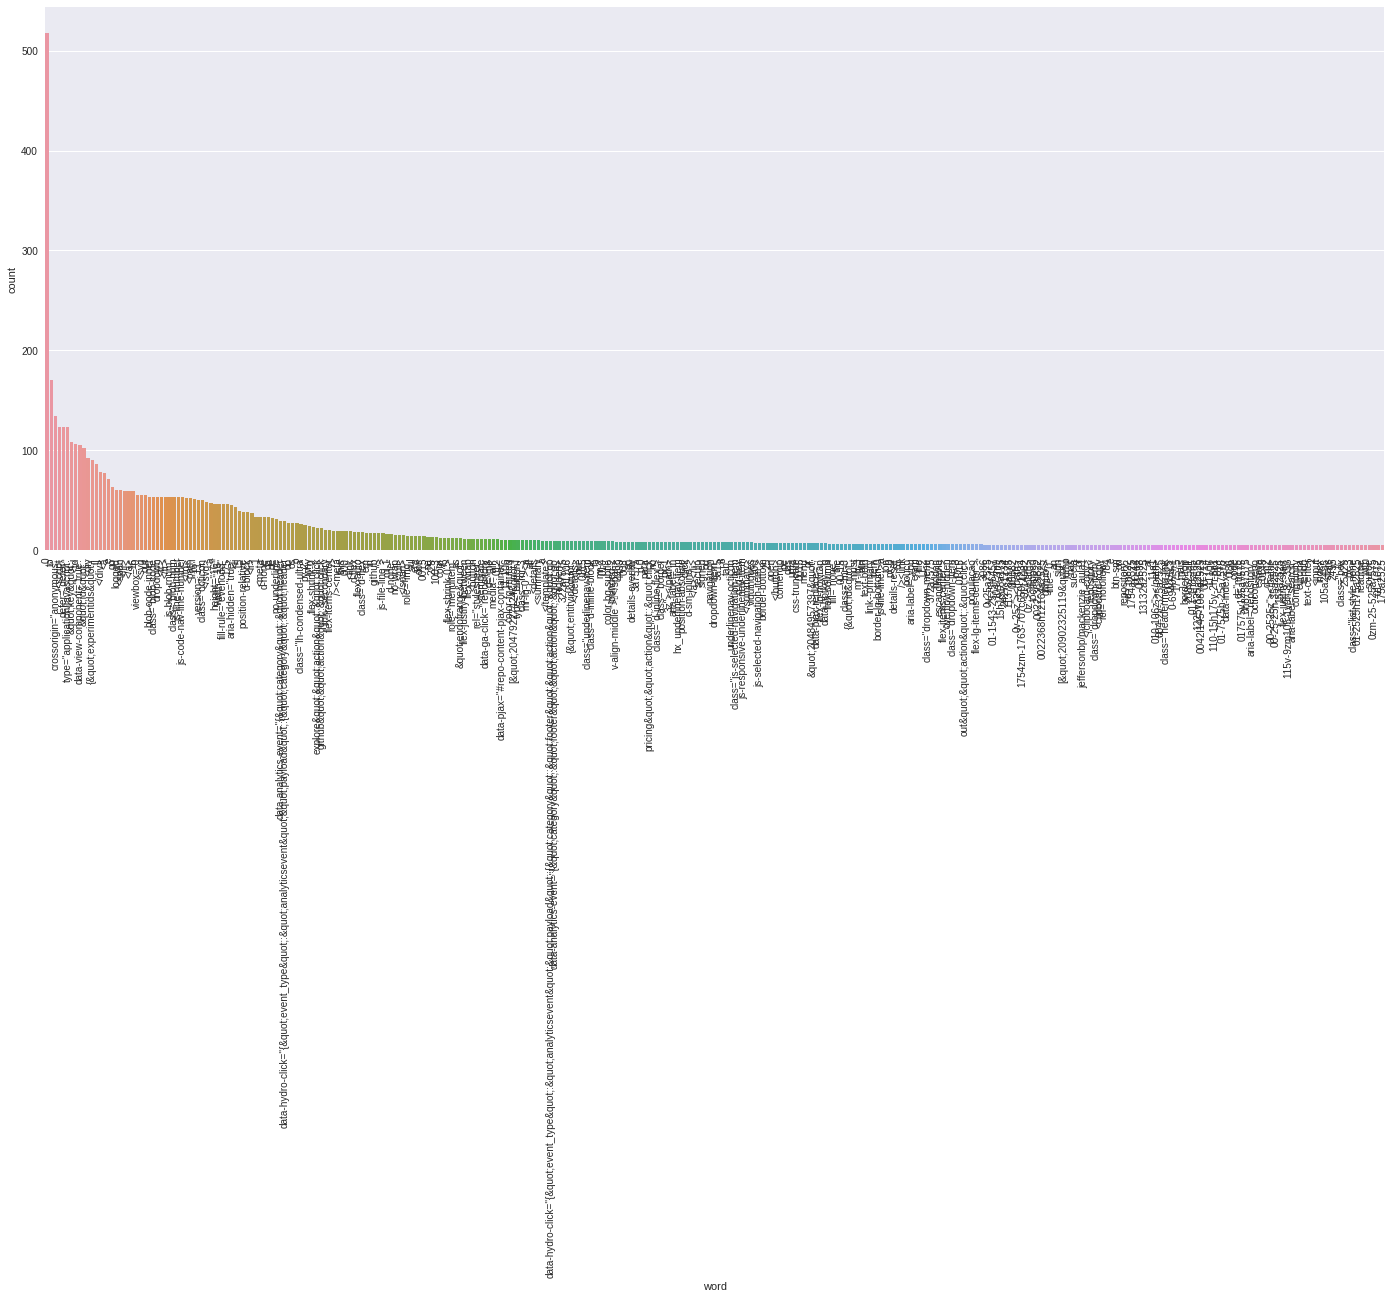

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()